In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
data = pd.read_csv('../data/cleaned_data.csv')

In [10]:
tv = TfidfVectorizer(max_features=5000, stop_words='english', use_idf=True, norm='l2')

vectorized_data = tv.fit_transform(data['merged_text_columns']).toarray()

In [11]:
vectorized_data.shape

(4890, 5000)

In [12]:
k_values = range(2,11)
inertias = []
silhouette_scores = []

In [ ]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(vectorized_data)

    inertias.append(kmeans.inertia_)

    labels = kmeans.labels_
    sil_score = silhouette_score(vectorized_data, labels)
    silhouette_scores.append(sil_score)

    print(f"k={k} -> INertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.3f}")6

k=2 -> INertia=4770.27, Silhouette=0.007
k=3 -> INertia=4736.92, Silhouette=0.008
k=4 -> INertia=4708.27, Silhouette=0.009
k=5 -> INertia=4686.53, Silhouette=0.010
k=6 -> INertia=4668.96, Silhouette=0.011
k=7 -> INertia=4644.76, Silhouette=0.012
k=8 -> INertia=4629.29, Silhouette=0.013
k=9 -> INertia=4622.65, Silhouette=0.012
k=10 -> INertia=4595.95, Silhouette=0.015


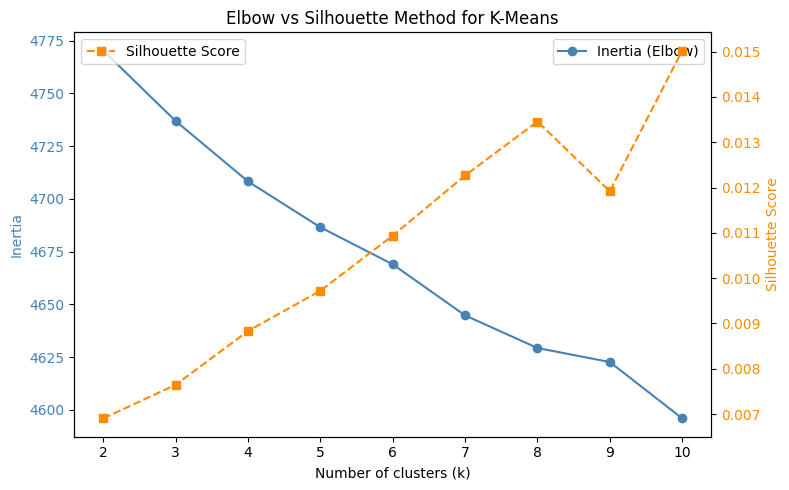

In [22]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(k_values, inertias, 'o-', color='steelblue', label='Inertia (Elbow)')
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("Inertia", color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, 's--', color='darkorange', label='Silhouette Score')
ax2.set_ylabel("Silhouette Score", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.legend()
plt.title("Elbow vs Silhouette Method for K-Means")
fig.tight_layout()
plt.show()
